<a href="https://colab.research.google.com/github/Farzad-R/LLM-Zero-to-Hundred/blob/master/tutorials/vectorization_tutorial/vectorization_bge_large_zh_v1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Text Vectorization Using BAAI/bge-large-zh-v1.5

This notebook provides a comprehensive visualization of text vectorization and demonstrates the power of vector search in processing and understanding natural language data. We leverage state-of-the-art machine learning techniques and tools to transform textual information into numerical representations that can be easily manipulated and analyzed. </br>

### Dependencies:
To achieve our goals, we rely on the following libraries and models:

>- **BAAI/bge-large-zh-v1.5**: This is the embedding model we use, which has an embedding dimension of 1024. It is designed to capture the semantic meaning of text in a high-dimensional space.
>- **sklearn.metrics.pairwise.cosine_similarity**: : A function from the scikit-learn library that allows us to compute the similarity between vectors.
>- **sklearn.decomposition.PCA**: Another scikit-learn tool that we use to perform Principal Component Analysis (PCA), reducing the dimensionality of our embeddings to 2 and 3 dimensions for visualization purposes.
>- **matplotlib**: A plotting library that enables us to create 2D and 3D plots to visually represent our data.
>- **mplcursors**: An interactive data cursor for matplotlib, which allows us to explore the plots more intuitively.

### Content Overview:

**I. [Define functions](#section_one)** </br>
We define three key functions to streamline our analysis:

>- plot_2D: A function to generate 2D plots of our vectorized text data.
>- get_embedding: This function utilizes our embedding model to convert text into numerical vectors.
>- compare: A utility to compare different text examples based on their vector representations.


**II. [Define examples](#section_two)** </br>
>- We introduce 12 examples spanning 4 distinct categories: animals, sports, modern society, and programming. These examples will serve as the basis for our vectorization and visualization.

**III. [Embedding](#section_three)** </br>
>- Here, we vectorize the examples using our chosen embedding model, transforming the text data into vectors.

**IV. [Apply PCA](#section_four)** </br>
>- We apply PCA to reduce the dimensionality of our embeddings from 1024 to 3 dimensions, making it possible to visualize the data in a lower-dimensional space.

**V. [Plot 2D](#section_five)** </br>
>- In this section, we create 2D plots of our examples to observe how text vectorization distinguishes between different categories.

**VI. [Plot 3D](#section_six)** </br>
>- We extend our visualization to 3D plots, providing another perspective on the separation between categories achieved through vectorization.

**VII. [Computing cosine similarity](#section_seven)** </br>
>- Finally, we compute the cosine similarity between selected examples to illustrate the effectiveness of vector search in identifying similar text data.

In [ ]:
!pip install -q -U FlagEmbedding mplcursors ipympl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mplcursors
from sklearn.decomposition import PCA
from typing import List, Optional
from sklearn.metrics.pairwise import cosine_similarity
from FlagEmbedding import FlagModel
from google.colab import output
output.enable_custom_widget_manager()

%matplotlib ipympl

In [ ]:
# Load embedding model
embedding_model = FlagModel('BAAI/bge-large-zh-v1.5',
                  query_instruction_for_retrieval="largest animal on the planet",
                  # use_fp16=True
                  )
# Setting use_fp16 to True speeds up computation with a slight performance degradation

<a id=section_one></a>
**Define functions**

In [ ]:
def plot_2D(x_values: List[float],
            y_values: List[float],
            labels: List[str]) -> None:
    """
    Plots a 2D scatter plot with interactive annotations.

    Parameters:
    x_values (List[float]): A list of x-coordinates for each point.
    y_values (List[float]): A list of y-coordinates for each point.
    labels (List[str]): A list of labels for each point.
    """
    # Create scatter plot
    fig, ax = plt.subplots()
    scatter = ax.scatter(x_values,
                         y_values,
                         alpha = 0.5,
                         edgecolors='k',
                         s = 40)

    # Create a mplcursors object to manage the data point interaction
    cursor = mplcursors.cursor(scatter, hover=True)

    #aes
    ax.set_title('Embedding visualization in 2D')  # Add a title
    ax.set_xlabel('X_1')  # Add x-axis label
    ax.set_ylabel('X_2')  # Add y-axis label

    # Define how each annotation should look
    @cursor.connect("add")
    def on_add(sel):
        sel.annotation.set_text(labels[sel.target.index])
        sel.annotation.get_bbox_patch().set(facecolor='white', alpha=0.5) # Set annotation's background color
        sel.annotation.set_fontsize(12)

    plt.show()

def compute_cosine_similarity(embeddings: np.ndarray, idx1: int, idx2: int) -> float:
    """
    Computes the cosine similarity between two embeddings.

    Parameters:
    embeddings (np.ndarray): An array of embeddings.
    idx1 (int): The index of the first embedding.
    idx2 (int): The index of the second embedding.

    Returns:
    float: The cosine similarity between the two embeddings.
    """
    return cosine_similarity([embeddings[idx1]],[embeddings[idx2]])[0][0]


def compare(embeddings: np.ndarray, idx1: int, idx2: int) -> float:
  return embeddings[idx1] @ embeddings[idx2].T


<a id=section_two></a>
Let's define 12 Examples in 4 different categories:

1. Animals
2. Sport
3. Moder society
4. programming

In [ ]:
animal_sen_1 = "Elephants are known for their exceptional memory and intelligence, often living in complex social structures."
animal_sen_2 = "The blue whale is the largest animal on the planet, with a heart the size of a small car."
animal_sen_3 = "Peregrine falcons are among the fastest birds, reaching over 200 miles per hour during their hunting stoop."


sport_sen_1 = "Soccer, known as football outside of North America, is the world's most popular sport, with a fan base that spans across continents."
sport_sen_2 = "The modern Olympic Games, revived in 1896, are a global event that brings together athletes from over 200 nations."
sport_sen_3 = "Serena Williams has dominated women's tennis with 23 Grand Slam singles titles, making her one of the greatest athletes of all time."


modern_society_sen_1 = "The advent of the internet has transformed modern society, enabling global connectivity and access to information at an unprecedented scale."
modern_society_sen_2 = "Climate change has become one of the most pressing issues of modern society, with a growing consensus on the need for sustainable practices."
modern_society_sen_3 = "Social media has reshaped the way we communicate and consume information, influencing everything from politics to personal relationships."


programming_sen_1 = "Python developers are wonderful people"
programming_sen_2 = "TypeScript, C++ or Java? All are great!"
programming_sen_3 = "I am a prograamer and my main programming language is C++."


# combine all the examples in one list
all_input_text = [
    animal_sen_1, animal_sen_2, animal_sen_3,
    sport_sen_1, sport_sen_2, sport_sen_3,
    modern_society_sen_1, modern_society_sen_2, modern_society_sen_3,
    programming_sen_1, programming_sen_2, programming_sen_3
    ]

<a id=section_three></a>

**Embedding**

In [ ]:
embeddings = []
for input_text in all_input_text:
    emb = embedding_model.encode(input_text)
    embeddings.append(emb)

embeddings_array = np.array(embeddings)
print("Shape: " + str(embeddings_array.shape), "\n")
print("Sample array:", embeddings_array[0])

Shape: (12, 1024) 

Sample array: [-0.02007181 -0.03125416  0.00736233 ... -0.02630602  0.04005409
  0.00504175]


<a id=section_four></a>

**Apply PCA**

In [ ]:
# Perform PCA for reducing the dimension from 1536 to 3
PCA_model = PCA(n_components=3)
PCA_model.fit(embeddings_array)
new_values = PCA_model.transform(embeddings_array)

print("Shape: " + str(new_values.shape))
print(new_values)

Shape: (12, 3)
[[ 0.04121745 -0.12310467  0.4157183 ]
 [ 0.03407452  0.28351846  0.27826136]
 [ 0.13509884  0.51528496  0.25263923]
 [-0.23061514  0.17405398 -0.30114695]
 [-0.3991536   0.12585185 -0.22646907]
 [-0.04400558  0.47103396 -0.25224444]
 [-0.33914405 -0.29234374  0.03676146]
 [-0.27273002 -0.23022616  0.25740945]
 [-0.31842995 -0.37997824 -0.01976972]
 [ 0.5652314  -0.12151995  0.13763544]
 [ 0.4930215  -0.22590376 -0.24726474]
 [ 0.33543476 -0.19666678 -0.3315304 ]]


<a id=section_five></a>

**2D plot**

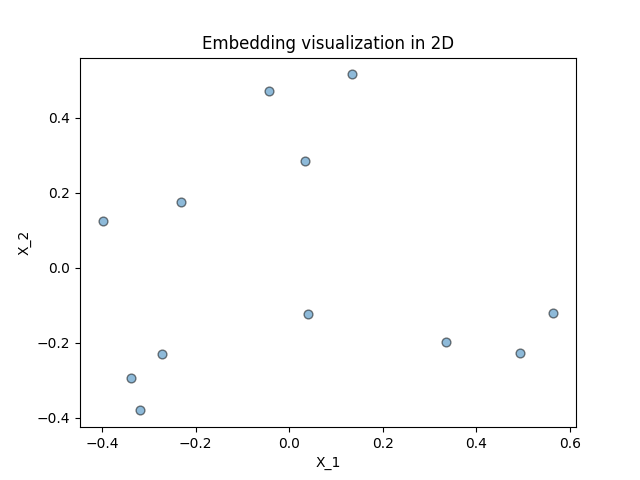

/usr/local/lib/python3.10/dist-packages/mplcursors/_pick_info.py:142: UserWarning: Selection.target.index is deprecated and will be removed in the future; use Selection.index instead.
  warnings.warn(


In [ ]:
plot_2D(new_values[:,0], new_values[:,1], all_input_text)

<a id=section_six></a>

**3D plot**

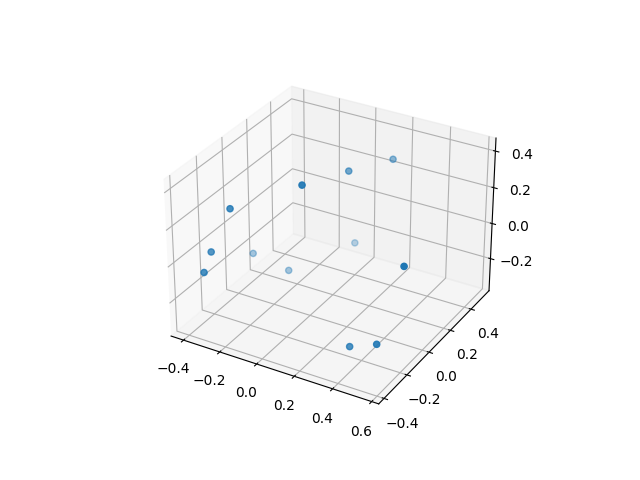

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(new_values[:, 0], new_values[:, 1], new_values[:, 2])

<a id=section_seven></a>
**Computing similarity using the method described in the [documentation](https://huggingface.co/BAAI/bge-large-zh-v1.5)**

- animal_sen_1: 0, animal_sen_2: 1, animal_sen_3: 2 </br>
- sport_sen_1: 3, sport_sen_2: 4, sport_sen_3: 5</br>
- modern_society_sen_1: 6, modern_society_sen_2: 7, modern_society_sen_3: 8</br>
- programming_sen_1: 9, programming_sen_2: 10, programming_sen_3: 11

In [ ]:
print("animal_sen_1 vs animal_sen_2:", compare(embeddings,0,1))
print("animal_sen_1 vs programming_sen_1:", compare(embeddings,0,10))
print("sport_sen_1 vs programming_sen_11:", compare(embeddings,3,4))
print("sport_sen_1 vs programming_sen_11:", compare(embeddings,3,11))

animal_sen_1 vs animal_sen_2: 0.4777344
animal_sen_1 vs programming_sen_1: 0.37957215
sport_sen_1 vs programming_sen_11: 0.6137636
sport_sen_1 vs programming_sen_11: 0.42854786


<a id=section_seven></a>
**Computing the cosine similarity**

- animal_sen_1: 0, animal_sen_2: 1, animal_sen_3: 2 </br>
- sport_sen_1: 3, sport_sen_2: 4, sport_sen_3: 5</br>
- modern_society_sen_1: 6, modern_society_sen_2: 7, modern_society_sen_3: 8</br>
- programming_sen_1: 9, programming_sen_2: 10, programming_sen_3: 11

In [ ]:
print("animal_sen_1 vs animal_sen_2:", compute_cosine_similarity(embeddings,0,1))
print("animal_sen_1 vs programming_sen_1:", compute_cosine_similarity(embeddings,0,10))
print("sport_sen_1 vs programming_sen_11:", compute_cosine_similarity(embeddings,3,4))
print("sport_sen_1 vs programming_sen_11:", compute_cosine_similarity(embeddings,3,11))

animal_sen_1 vs animal_sen_2: 0.47773442
animal_sen_1 vs programming_sen_1: 0.37957218
sport_sen_1 vs programming_sen_11: 0.6137636
sport_sen_1 vs programming_sen_11: 0.42854786
